## Joint Training of Intents + Task using DIET Classifier for RASA NLU

In [ ]:
# # Install required libraries
# !pip3 install rasa

# # Spacy Dependencies

# pip3 install rasa[spacy]
# python3 -m spacy download en_core_web_md
# python3 -m spacy link en_core_web_md en

# Install Tensorflow for DIET Classifier
# pip3 install tensorflow

In [ ]:
# rasa init
# Create a new project called 'rasa_test'

In [37]:
# Change the config.yml to include the DIETClassifier

# Configuration file - config.yml
import yaml
import os
PATH = "rasa_test"
with open(os.path.join(PATH,'config.yml')) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    config = yaml.load(file, Loader=yaml.FullLoader)

config

{'language': 'en',
 'pipeline': [{'name': 'SpacyNLP'},
  {'name': 'SpacyTokenizer'},
  {'name': 'SpacyFeaturizer'},
  {'name': 'RegexFeaturizer'},
  {'name': 'LexicalSyntacticFeaturizer'},
  {'name': 'CountVectorsFeaturizer'},
  {'name': 'CountVectorsFeaturizer',
   'analyzer': 'char_wb',
   'min_ngram': 1,
   'max_ngram': 4},
  {'name': 'DIETClassifier', 'epochs': 100}],
 'policies': None}

In [ ]:
# Lets process the data from ChatCorpus.json

# Text processing for Training Data for DIET Classifier

import os
import json
import spacy
import pandas as pd
import numpy as np

json_path = "nlp_project"
file_name = "ChatbotCorpus.json"

json_data = json.load(open(os.path.join(json_path,file_name),"r"))
nlp = spacy.load("en_core_web_sm")

text_split = []
sno_rep = []
sno = []
intents = []
entities = []

entity_texts = []
for i,line in enumerate(json_data['sentences']):
    sno.append(i+1)
    doc = nlp(line['text'])
    intents.append(line['intent'])
    entities = entities + [x['entity'] for x in line['entities']]
    new_text = []
    for i,text in enumerate(doc):
        entity_text = doc[i].text
        for x in line['entities']:          
            if i == x['start']:
                entity_text = "["+ entity_text
            if i == x['stop']:
                entity_text = entity_text + "]" + "(" + x['entity'] +")"
        new_text.append(entity_text)
    entity_texts.append(" ".join(new_text))


entity_texts = np.array(entity_texts)

intents_set = set(intents)
intents = np.array(intents)
f = open("rasa_nlu_data.yml","w")
f.write("version: \"2.0\"")
f.write("\n")
f.write("\n")
f.write("nlu:")
f.write("\n")

for intent in intents_set:  
    f.write("- intent: "+intent)
    f.write("\n")
    f.write("  examples: |")
    f.write("\n")
    intent_texts = entity_texts[np.where(intents==intent)[0]]
    for intent_text in intent_texts:
        f.write("    - ")
        f.write(intent_text)
        f.write("\n")
    f.write("\n")


f.close()

In [ ]:
## Place the file rasa_nlu_data.yml under data folder

## Run
## For Splitting the data into train and test

# rasa data split nlu
# rasa train
# rasa test nlu --nlu data/rasa_nlu_data.yml --cross-validation

Confusion Matrix


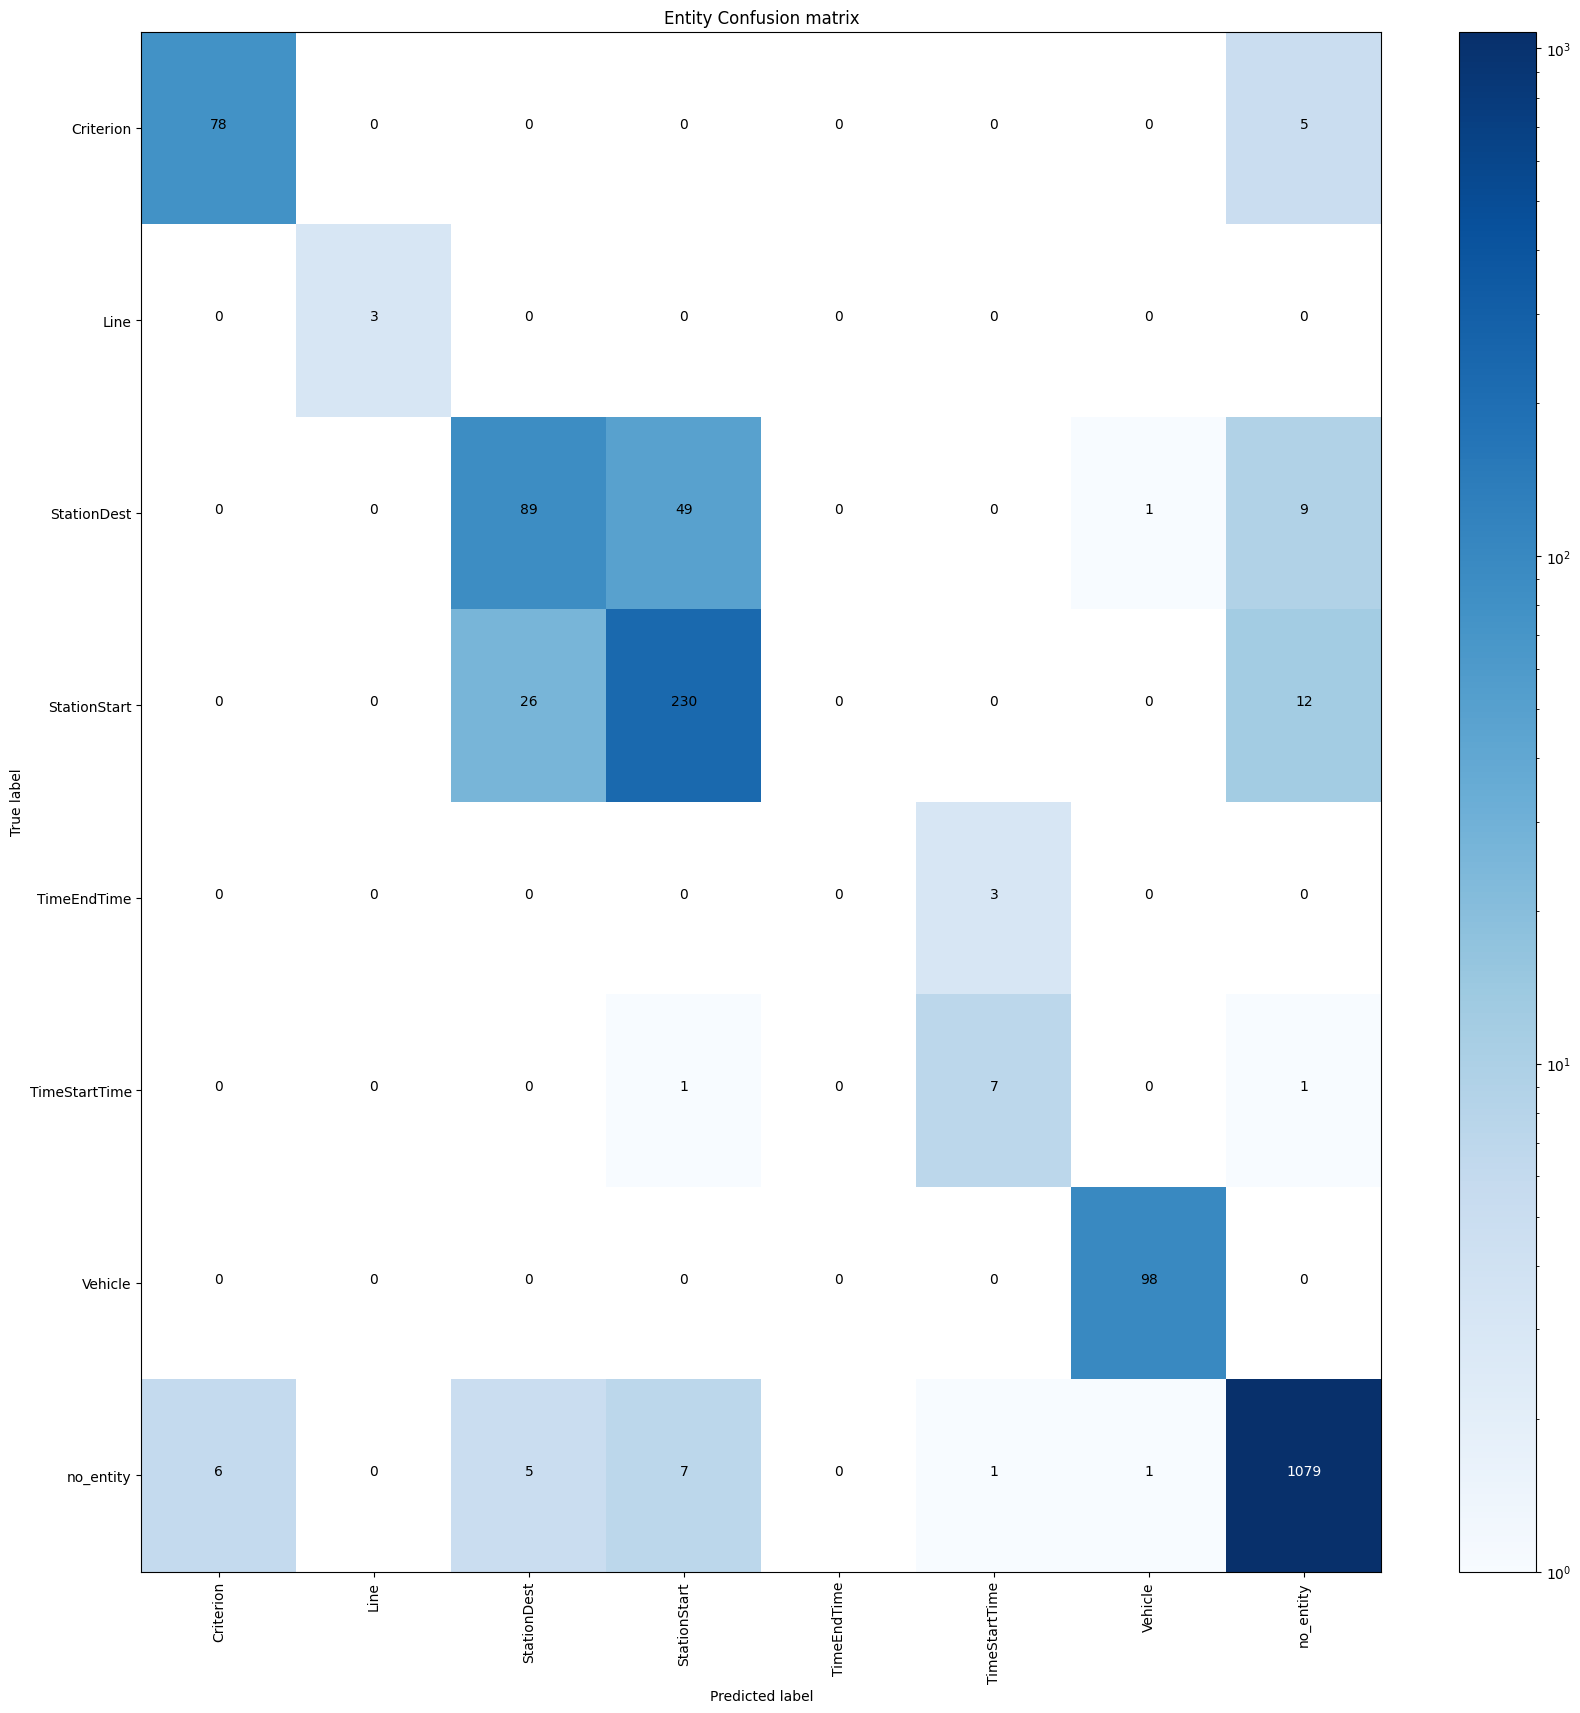

In [16]:
# Results after training
from IPython.display import Image
print("Confusion Matrix")
Image(filename=os.path.join(PATH,'results/DIETClassifier_confusion_matrix.png'),width = 800)


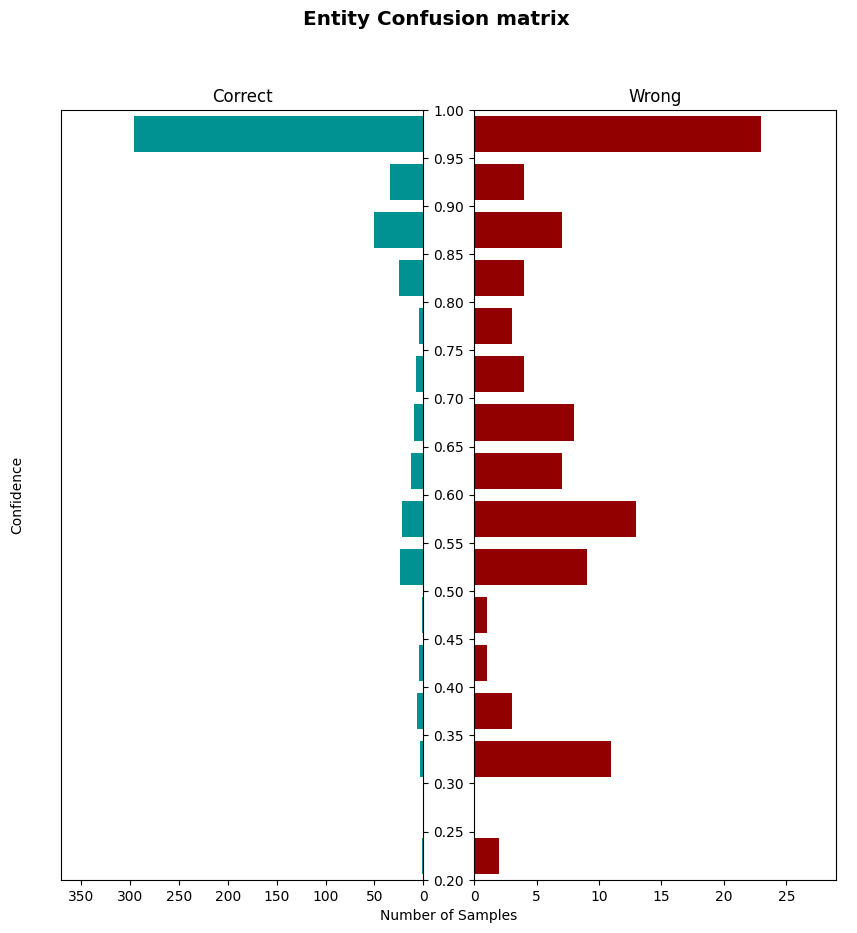

In [19]:
Image(filename=os.path.join(PATH,'results/DIETClassifier_histogram.png'),width = 400,height=600)

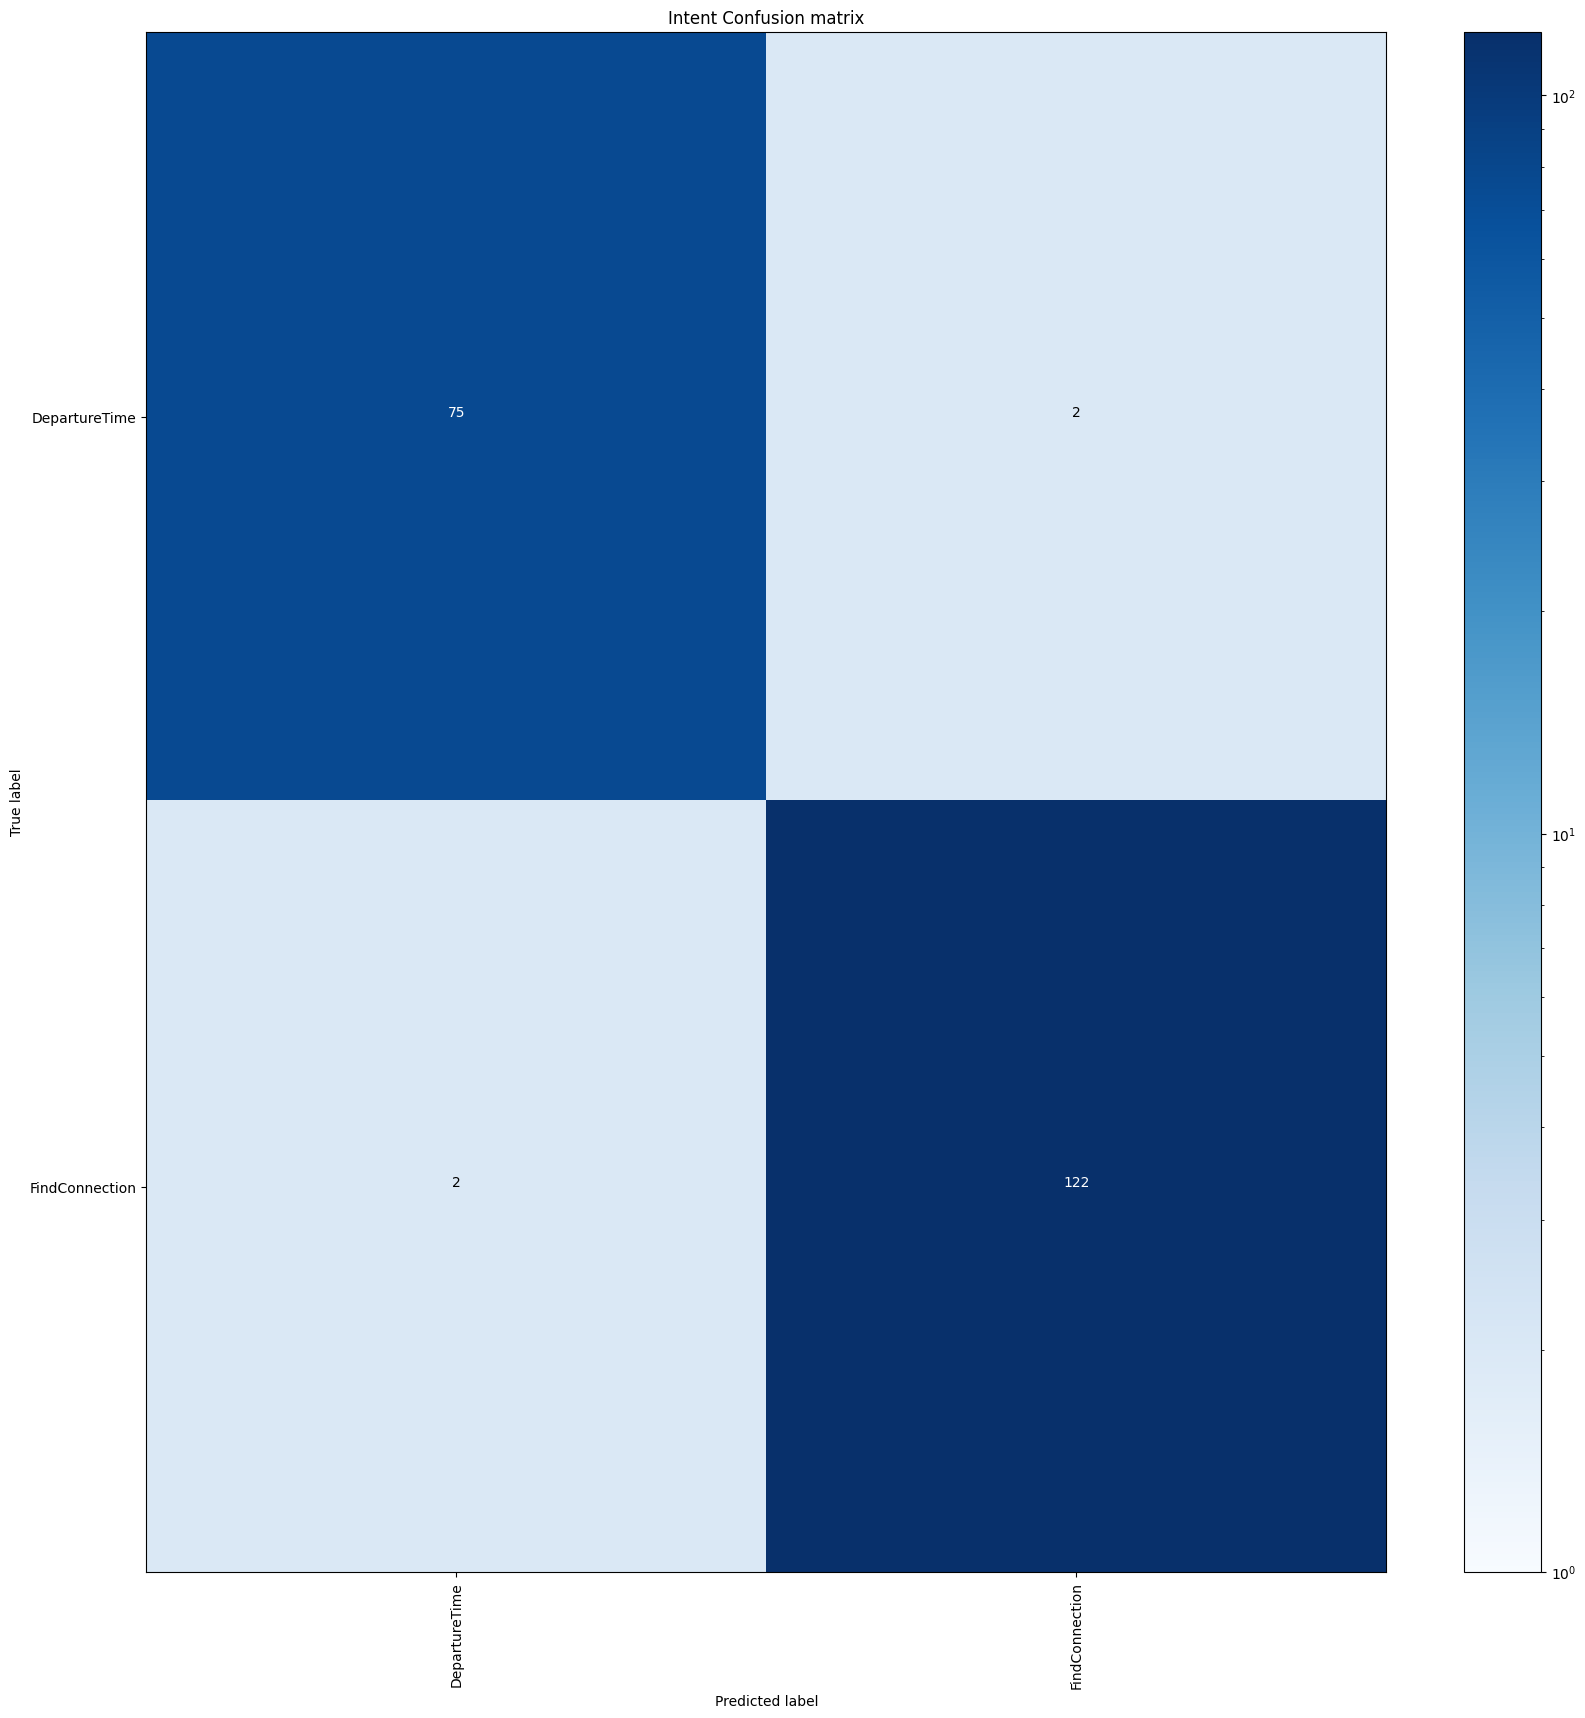

In [20]:
Image(filename=os.path.join(PATH,'results/intent_confusion_matrix.png'),width = 400,height=600)

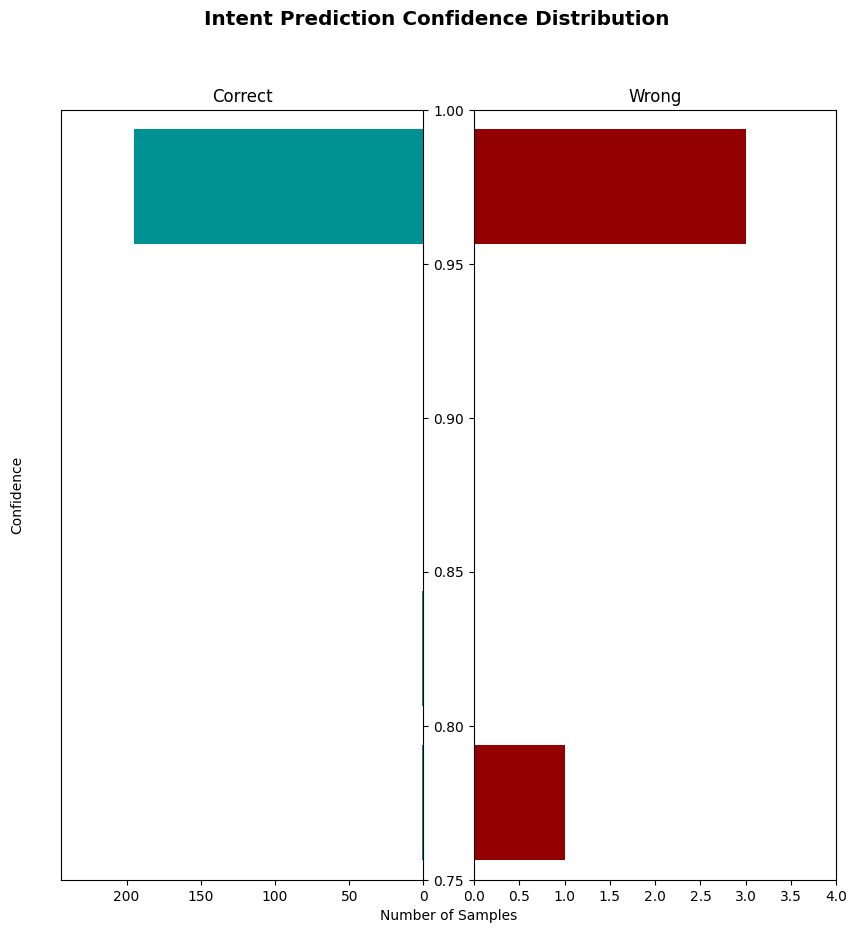

In [24]:
Image(filename=os.path.join(PATH,'results/intent_histogram.png'),width = 400,height=500)

In [34]:
# Intent Report
import json
intent_report = json.load(open(os.path.join(PATH,"results/intent_report.json"),"r"))
print(json.dumps(intent_report, indent=2))

{
  "FindConnection": {
    "precision": 0.9838709677419355,
    "recall": 0.9838709677419355,
    "f1-score": 0.9838709677419355,
    "support": 124,
    "confused_with": {
      "DepartureTime": 2
    }
  },
  "DepartureTime": {
    "precision": 0.974025974025974,
    "recall": 0.974025974025974,
    "f1-score": 0.974025974025974,
    "support": 77,
    "confused_with": {
      "FindConnection": 2
    }
  },
  "accuracy": 0.9800995024875622,
  "macro avg": {
    "precision": 0.9789484708839548,
    "recall": 0.9789484708839548,
    "f1-score": 0.9789484708839548,
    "support": 201
  },
  "weighted avg": {
    "precision": 0.9800995024875622,
    "recall": 0.9800995024875622,
    "f1-score": 0.9800995024875622,
    "support": 201
  }
}


In [35]:
classifier_report = json.load(open(os.path.join(PATH,"results/DIETClassifier_report.json"),"r"))
print(json.dumps(classifier_report, indent=2))

{
  "Vehicle": {
    "precision": 0.98,
    "recall": 1.0,
    "f1-score": 0.98989898989899,
    "support": 98,
    "confused_with": {}
  },
  "StationStart": {
    "precision": 0.8013937282229965,
    "recall": 0.8582089552238806,
    "f1-score": 0.8288288288288289,
    "support": 268,
    "confused_with": {
      "StationDest": 26
    }
  },
  "StationDest": {
    "precision": 0.7416666666666667,
    "recall": 0.6013513513513513,
    "f1-score": 0.664179104477612,
    "support": 148,
    "confused_with": {
      "StationStart": 49
    }
  },
  "Criterion": {
    "precision": 0.9285714285714286,
    "recall": 0.9397590361445783,
    "f1-score": 0.9341317365269461,
    "support": 83,
    "confused_with": {}
  },
  "Line": {
    "precision": 1.0,
    "recall": 1.0,
    "f1-score": 1.0,
    "support": 3,
    "confused_with": {}
  },
  "TimeEndTime": {
    "precision": 0.0,
    "recall": 0.0,
    "f1-score": 0.0,
    "support": 3,
    "confused_with": {
      "TimeStartTime": 3
    }
  },